# Part One: Classifiers

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings as wn
import statistics as st

from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



In [3]:
wn.filterwarnings(action='ignore')

# making a fake data set here.
X, y = make_classification(n_features=20, n_redundant=0, n_informative=5, n_clusters_per_class=1)
X += 4.0 * np.random.uniform(size=X.shape)

# Load the datasets
datasets = [np.asarray(pd.read_csv("php9xWOpn.csv")), np.asarray(pd.read_csv("dataset_59_ionosphere.csv")),np.asarray(pd.read_csv("php50jXam.csv")), np.column_stack((X, y))]
dataset_titles = ["Steel Plate Fault", "Ionsphere", "Bank Notes", "Fake Data"]


mean_table = {"KNeighbors": [], "GaussianNB": [], "LogisticRegression": [], "DecisionTree": [], "GradientBoosting": [], "RandomForest": [], "MLP": []}
val_table = {"KNeighbors": [], "GaussianNB": [], "LogisticRegression": [], "DecisionTree": [], "GradientBoosting": [], "RandomForest": [], "MLP": []} 

In [3]:
def run_classifier(clf, train_x, train_y):
    results = []
    for i in range(250):
        #train the data with a 50:50 split
        X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.5, random_state=i)
        
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
            
        score = accuracy_score(y_test, pred)
            
        results.append(score)
    return results

In [4]:
def run_KNeighborsClassifier(train_x, train_y):
    final_results = []
    best_mean = 0
    best_val = 0
    
    for val in [1, 2, 3, 4, 5]:
                
        clf = KNeighborsClassifier(n_neighbors=val)
        
        results = run_classifier(clf, train_x, train_y)
        mean_results = st.mean(results)
        
        if mean_results > best_mean:
            best_mean = mean_results
            best_val = val
    
        
        final_results.append(results)
        
    mean_table["KNeighbors"].append(best_mean)
    val_table["KNeighbors"].append(best_val)
    print("Done: KNeighbors")
    return final_results

In [5]:
def run_GaussianNB(train_x, train_y):
    final_results = []
    best_mean = 0
    best_val = 0
    
    for val in [1e-9,1e-5,1e-1]:
        
        clf = GaussianNB(var_smoothing=val)
        results = run_classifier(clf, train_x, train_y)
        mean_results = st.mean(results)
        
        if mean_results > best_mean:
            best_mean = mean_results
            best_val = val
    
        
        final_results.append(results)
        
    mean_table["GaussianNB"].append(best_mean)
    val_table["GaussianNB"].append(best_val)
    print("Done: GaussianNB")

    return final_results

In [6]:
def run_LogisticRegression(train_x, train_y):
    final_results = []
    best_mean = 0
    best_val = 0
    
    for val in [.1,.5,1.0,2.0, 5.0]:
        
        clf = LogisticRegression(C=val)
        results = run_classifier(clf, train_x, train_y)
        mean_results = st.mean(results)
        
        if mean_results > best_mean:
            best_mean = mean_results
            best_val = val
    
        
        final_results.append(results)
        
    mean_table["LogisticRegression"].append(best_mean)
    val_table["LogisticRegression"].append(best_val)
    print("Done: LogisticRegression")
  
    return final_results

In [7]:
def run_DecisionTreeClassifier(train_x, train_y):
    final_results = []
    best_mean = 0
    best_val = 0
    
    for val in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
        
        clf = DecisionTreeClassifier(max_depth=val)
        results = run_classifier(clf, train_x, train_y)
        mean_results = st.mean(results)
        
        if mean_results > best_mean:
            best_mean = mean_results
            best_val = val
    
        
        final_results.append(results)
        
    mean_table["DecisionTree"].append(best_mean)
    val_table["DecisionTree"].append(best_val)
    print("Done: DecisionTree")
        
    return final_results

In [8]:
def run_GradientBoostingClassifier(train_x, train_y):
    final_results = []
    best_mean = 0
    best_val = 0
    
    for val in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
        
        clf = GradientBoostingClassifier(max_depth=val)
        results = run_classifier(clf, train_x, train_y)
        mean_results = st.mean(results)
        
        if mean_results > best_mean:
            best_mean = mean_results
            best_val = val
    
        
        final_results.append(results)
        
    mean_table["GradientBoosting"].append(best_mean)
    val_table["GradientBoosting"].append(best_val)
    print("Done: GradientBoosting")
        
    return final_results

In [9]:
def run_RandomForestClassifier(train_x, train_y):
    final_results = []
    best_mean = 0
    best_val = 0
    
    for val in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
        
        clf = RandomForestClassifier(max_depth=val)
        results = run_classifier(clf, train_x, train_y)
        mean_results = st.mean(results)
        
        if mean_results > best_mean:
            best_mean = mean_results
            best_val = val
    
        
        final_results.append(results)
        
    mean_table["RandomForest"].append(best_mean)
    val_table["RandomForest"].append(best_val)
    print("Done: RandomForest")
        
    return final_results

In [10]:
def run_MLPClassifier(train_x, train_y):
    final_results = []
    best_mean = 0
    best_val = 0
    
    for val in [1e-5, 1e-3,0.1, 10.0]:
        
        clf = MLPClassifier(alpha=val, max_iter=500)
        results = run_classifier(clf, train_x, train_y)
        mean_results = st.mean(results)
        
        if mean_results > best_mean:
            best_mean = mean_results
            best_val = val
    
        
        final_results.append(results)
        
    mean_table["MLP"].append(best_mean)
    val_table["MLP"].append(best_val)
    print("Done: MLP")
        
    return final_results

Done: KNeighbors
Done: GaussianNB
Done: LogisticRegression
Done: DecisionTree
Done: GradientBoosting
Done: RandomForest
Done: MLP
Completed Data Set:  Steel Plate Fault
Done: KNeighbors
Done: GaussianNB
Done: LogisticRegression
Done: DecisionTree
Done: GradientBoosting
Done: RandomForest
Done: MLP
Completed Data Set:  Ionsphere
Done: KNeighbors
Done: GaussianNB
Done: LogisticRegression
Done: DecisionTree
Done: GradientBoosting
Done: RandomForest
Done: MLP
Completed Data Set:  Bank Notes
Done: KNeighbors
Done: GaussianNB
Done: LogisticRegression
Done: DecisionTree
Done: GradientBoosting
Done: RandomForest
Done: MLP
Completed Data Set:  Fake Data


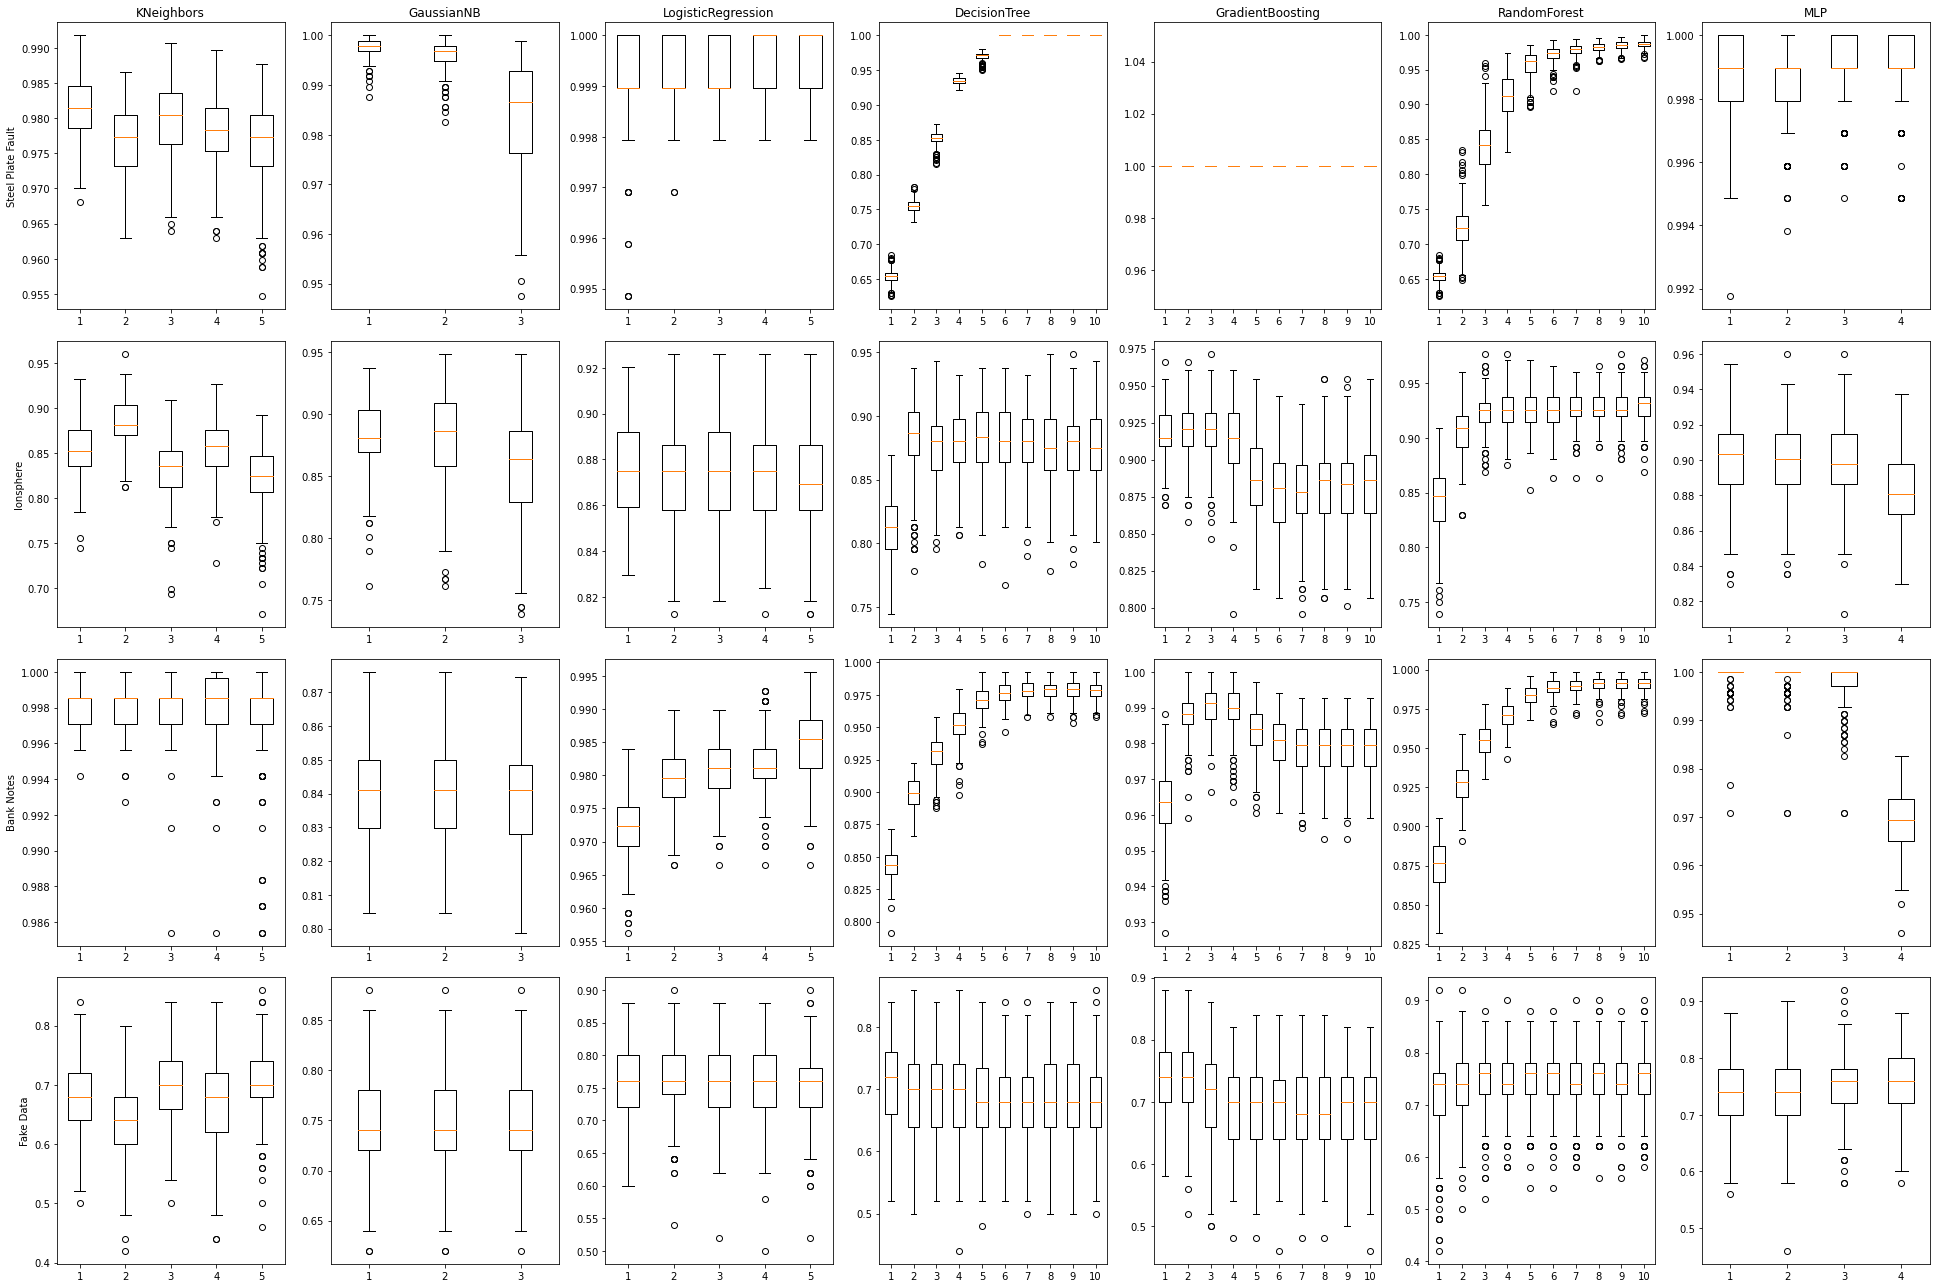

In [11]:
fig, axs = plt.subplots(4, 7,figsize=(27, 18))


for i, data in enumerate(datasets):
    
    i-1

    train_x, train_y = np.split(data, [-1], axis=1)
    
    #Scale the data
    ss = StandardScaler()
    train_x = ss.fit_transform(train_x)
    
    #Lebel encode the class
    le = preprocessing.LabelEncoder()
    train_y = le.fit_transform(train_y)
    
    #Plot each calssifier 
    axs[0, 0].set_title("KNeighbors")
    axs[i, 0].boxplot(run_KNeighborsClassifier(train_x, train_y))
    axs[i, 0].set_ylabel(dataset_titles[i])

    
    axs[0, 1].set_title("GaussianNB")
    axs[i, 1].boxplot(run_GaussianNB(train_x, train_y))
    
    axs[0, 2].set_title("LogisticRegression")
    axs[i, 2].boxplot(run_LogisticRegression(train_x, train_y)) 
    
    axs[0, 3].set_title("DecisionTree")
    axs[i, 3].boxplot(run_DecisionTreeClassifier(train_x, train_y))
    
    axs[0, 4].set_title("GradientBoosting")
    axs[i, 4].boxplot(run_GradientBoostingClassifier(train_x, train_y))
    
    axs[0, 5].set_title("RandomForest")
    axs[i, 5].boxplot(run_RandomForestClassifier(train_x, train_y))
    
    axs[0, 6].set_title("MLP")
    axs[i, 6].boxplot(run_MLPClassifier(train_x, train_y))
    
    print("Completed Data Set: ", dataset_titles[i])

plt.tight_layout()
plt.show()

# Summary Tables

In [4]:
mean_df = pd.DataFrame(data=mean_table)
mean_df.index=["Steel Plate Fault", "Ionsphere", "Bank Notes", "Fake Data"]

val_df = pd.DataFrame(data=val_table)
val_df.index=["Steel Plate Fault", "Ionsphere", "Bank Notes", "Fake Data"]

display(mean_df)
display(val_df)

ValueError: Length mismatch: Expected axis has 0 elements, new values have 4 elements

The results found in the two tables above si that the Classifiers struggled allot more on the fake data with MPL producing the best average score of 0.75 compared to the lowest score of all the other data sets being 0.84 which is almost 10% more accurate. This is expected as the is no pattern to random data where the other 3 data sets where able to use the training sets to create a more robust classifier


I noticed that for decision tree and gradient boosting on the steel plate fault data the accuaracy is 100%

# Part Two: Clustering

In [8]:
def run_cluster(train_x, train_y):
    
    return_data = []
    
    for i in range(100):

        #split the data into train and test sets 95/5
        X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.95, random_state=i)

        clf = GaussianNB()
        clf.fit(X_train, y_train)

        pred = clf.predict(X_test)       
        score = accuracy_score(y_test, pred)

        return_data.append(score)

    return return_data

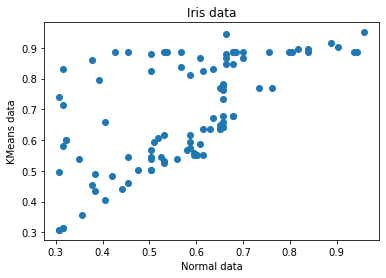

In [34]:
from sklearn.cluster import KMeans

iris_df = pd.read_csv("dataset_61_iris.csv")
iris_df_kmeans = pd.read_csv("dataset_61_iris.csv")


#Map the classes to integers
label = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
iris_df['class'] = iris_df['class'].map(label)

#Iris data with kmeans labels
temp = iris_df.drop(['class'], axis=1)

#fit to KMeans
kmeans = KMeans(n_clusters=3).fit(temp)
kmeans.predict(temp)


#Add the new labels
iris_df_kmeans.insert(4, 'new_feature', pd.Series(kmeans.labels_, index=iris_df_kmeans.index))

#change to numpy array
iris_df = np.asarray(iris_df)
iris_df_kmeans = np.asarray(iris_df_kmeans)

#split the labels
train_x, train_y = np.split(iris_df, [-1], axis=1)
final_data_no_cluster = run_cluster(train_x, train_y)


train_x, train_y = np.split(iris_df_kmeans, [-1], axis=1)
final_data_cluster = run_cluster(train_x, train_y)


plt.scatter(final_data_no_cluster, final_data_cluster);
plt.title("Iris data")
plt.xlabel("Normal data")
plt.ylabel("KMeans data")
plt.show()

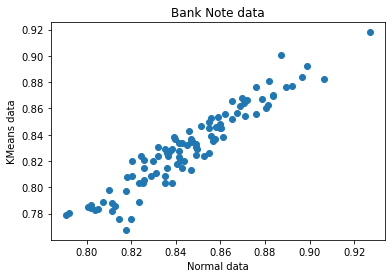

In [35]:
bank_df = pd.read_csv("php50jXam.csv")
bank_df_kmeans = pd.read_csv("php50jXam.csv")


temp = bank_df.drop(['Class'], axis=1)


#fit to KMeans
kmeans = KMeans(n_clusters=3).fit(temp)
kmeans.predict(temp)

#Add the new labels
bank_df_kmeans.insert(4, 'V5', pd.Series(kmeans.labels_, index=bank_df_kmeans.index))

#change to numpy array
bank_df = np.asarray(bank_df)
bank_df_kmeans = np.asarray(bank_df_kmeans)

#split the labels
train_x, train_y = np.split(bank_df, [-1], axis=1)
final_data_no_cluster = run_cluster(train_x, train_y)


train_x, train_y = np.split(bank_df_kmeans, [-1], axis=1)
final_data_cluster = run_cluster(train_x, train_y)


plt.scatter(final_data_no_cluster, final_data_cluster);

plt.title("Bank Note data")
plt.xlabel("Normal data")
plt.ylabel("KMeans data")
plt.show()